# Dilute activation experiment

In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from model.VirtualRatModel import VirtualRatModel
from model.VirtualRatSolver import VirtualRatSolver
from model.VirtualRatBox import VirtualRatBox
from model.VirtualRat import VirtualRat
from model.VirtualRatFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

W0817 03:55:03 21133 minpy.dispatch.registry:register:47] Type MXNet for name reshape has already existed
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:672: DeprecationWarning: PlainTextFormatter

## No need to run this if you only want to plot figures.

In [ ]:
"""
which_to_choose = load_weights("pkls/time_steps_for_3d-0.85.pkl")
linspace_num = 11
pro_ratio = np.zeros((0,linspace_num))
anti_ratio = np.zeros((0,linspace_num))

for i in range(len(which_to_choose)):
    ratname = "VirtualRat"+str(which_to_choose[i][0])
    try:
        loaded_params = load_weights("/scratch/xl1066/VirtualRat/publication/TrainingTime/trainedTrainingTime-"+\
                                     str(which_to_choose[i][0])+"-"+str(which_to_choose[i][1]*100)+".pkl")
        print ratname
    except IOError:
        continue
    np.random.seed(which_to_choose[i][0])
    npp.random.seed(which_to_choose[i][0])
    box = VirtualRatBox(mode="alternative",length=1000,block_size=30)
    test_X, test_y = box.X, box.y
    model = VirtualRatModel()
    rat = VirtualRat(model,ratname = ratname, trial_window = 3)
    solver = VirtualRatSolver(model, box)
    
    np.random.seed(which_to_choose[i][0])
    npp.random.seed(which_to_choose[i][0])
    
    solver.init()
    solver.load_params(loaded_params)
    probs = rat.predict(test_X, test_y)
    
    pro_switch_cost = []
    anti_switch_cost = []

    pro_switch_cost_baseline = rat.pro_switch_cost
    anti_switch_cost_baseline = rat.anti_switch_cost
    for j in np.linspace(0,1, num=linspace_num):
        print j
        mask = np.ones((5,20))
        mask[0,:] = j
        model.lesion(mask = mask)
        
        np.random.seed(which_to_choose[i][0])
        npp.random.seed(which_to_choose[i][0])
        solver.init()
        solver.load_params(loaded_params)
        
        probs = rat.predict(box.X,box.y)
        pro_switch_cost.append(rat.pro_switch_cost)
        anti_switch_cost.append(rat.anti_switch_cost)
    pro_switch_cost_ratio = np.array(pro_switch_cost) / pro_switch_cost_baseline
    anti_switch_cost_ratio = np.array(anti_switch_cost) / anti_switch_cost_baseline

    pro_ratio = np.append(pro_ratio, np.expand_dims(pro_switch_cost_ratio, axis=0), axis = 0)
    anti_ratio = np.append(anti_ratio, np.expand_dims(anti_switch_cost_ratio, axis=0), axis = 0)
save_weights("pkls/dilutePro-0.85.pkl",pro_ratio)
save_weights("pkls/diluteAnti-0.85.pkl",anti_ratio)
"""

In [2]:
pro_ratio = load_weights("pkls/dilutePro-0.85.pkl")
anti_ratio = load_weights("pkls/diluteAnti-0.85.pkl")
pro_ratio_cleaned = pro_ratio[np.sum(np.isnan(pro_ratio),axis=1) == 0,:]
anti_ratio_cleaned = anti_ratio[np.sum(np.isnan(anti_ratio),axis=1) == 0,:]
ratio = np.append(pro_ratio_cleaned,anti_ratio_cleaned,axis=0)

/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


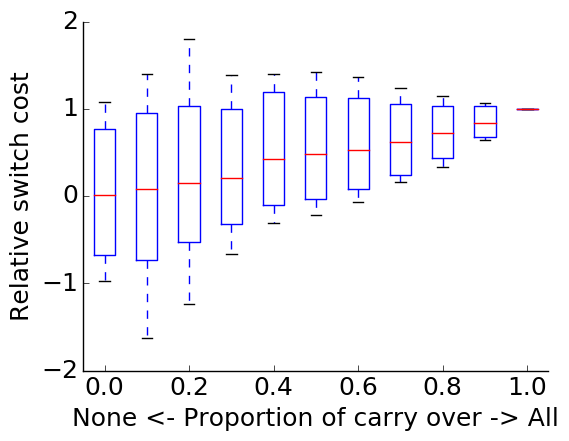

In [3]:
#diluteActivationMedian(ratio,filename = "figures/Dilute.pdf")
diluteActivationMedian(ratio)